# Consumo y prevalencia de alcohol 2016-2017

Toda la información sobre los datos que se usan a continuación, se pueden encontrar en el siguiente link: https://www.gob.mx/salud%7Cconadic/acciones-y-programas/encuesta-nacional-de-consumo-de-drogas-alcohol-y-tabaco-encodat-2016-2017-136758

In [99]:
# Importing important stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

Los datos están en un mismo excel, pero en distintas hojas, así que necesitamos tratarlas por separado.

## ¿A qué edad las personas comienzan a tomar?

Algo que nos podría preocupar ciertamente es, la edad incial a la cual las personas empiezan a tomar alcohol, para ellos, elaboramos la tabla 3 como se sigue.

In [96]:
# Esta primera tabla es Necesidades de atención por el Consumo de Alcohol en la población de 12 a 65 años
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df1 = pd.read_excel(xls, 'Table 4', header=0, usecols=list(range(7)))
alcoholData = []
for column in df1:
    alcoholData.append(list(df1[column]))
alcoholData = np.array(alcoholData).T
multi = [("Sexo",""),("2011","17 años o menos %"),("2011", "18 a 25 años %"), ("2011","26 a 65 años %"),("2017", "17 años o menos %"), ("2017","18 a 25 años %"),("2017", "26 a 65 años %")]
df1 = pd.DataFrame(alcoholData, columns=multi)
df1.columns = pd.MultiIndex.from_tuples(df1.columns)
df1 = df1.set_index("Sexo")
df1

2011                                            2017  \
        17 años o menos % 18 a 25 años % 26 a 65 años % 17 años o menos %   
Sexo                                                                        
Hombres              64.9           33.0            2.1              61.5   
Mujeres              43.3           46.1           10.6              43.1   
Total                55.2           38.9            5.9              53.1   

                                       
        18 a 25 años % 26 a 65 años %  
Sexo                                   
Hombres           36.5            2.0  
Mujeres           47.1            9.8  
Total             41.3            5.6

Aquí podemos ver los registros del 2011 y del 2017, comparemoslos en una gráfica

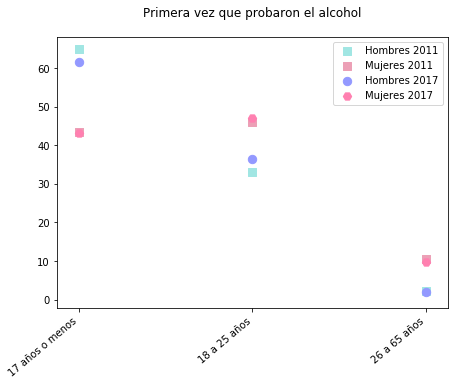

In [97]:
fig, ax = plt.subplots(figsize = (7,5))
x = ["17 años o menos","18 a 25 años", "26 a 65 años"]
hombres2011 = [64.9, 33.0, 2.1]
mujeres2011 = [43.3, 46.1, 10.6]
hombres2017 = [61.5, 36.5, 2.0]
mujeres2017 = [43.1, 47.1, 9.8]
ax.scatter(x, hombres2011, label="Hombres 2011", color="#a1e6e3", s=70, marker="s")
ax.scatter(x, mujeres2011, label="Mujeres 2011", color="#eca0b6", s=70, marker="s")
ax.scatter(x, hombres2017, label="Hombres 2017", color="#9399ff", s=70, marker="o")
ax.scatter(x, mujeres2017, label="Mujeres 2017", color="#ff80b0", s=70, marker="H")
plt.title("Primera vez que probaron el alcohol", pad=20)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
ax.plot()
aux = 1

De la gráfica anterior, podemos observar que la mayoría de las personas, tanto hombres como mujeres, empiezan a tomar alcohol desde antes de los 18 años, esta es una edad en las personas son muy influenciables y puede ocasionar problemas en el futuro. Pero podemos notar algo interesante, y es que la cantidad de hombres que empezaron con el alcohol antes de los 17, en el 2011 es mayor a la cantidad del 2017, significa que algo ha pasado en ese transcurso del tiempo que ha llegado a disminuir el consumo en gente tan joven. O que nos faltan datos, mientras tanto, las mujeres siguen igual y de hecho sus gráficas no cambian significativamente en los años. 

Esta base de datos también nos proporciona información por regiones, de ahí nos podemos realizar algunas preguntas interesantes como:

## ¿Cuál es la zona o región donde más alcohol se consume?

In [101]:
# Esta primera tabla es Necesidades de atención por el Consumo de Alcohol en la población de 12 a 65 años
xls = pd.ExcelFile('./data/ENCODAT_ALCOHOL_2016_2017.xlsx')
df2 = pd.read_excel(xls, 'Table 8', header=1, usecols=list(range(5)))
alcoholData = []
for column in df2:
    alcoholData.append(list(df2[column]))
alcoholData = np.array(alcoholData).T
multi = [("Región",""),("2011","Consumo Excesivo en el Último Año"),("2011", "Consumo Excesivo en el Último Mes"), ("2017","Consumo Excesivo en el Último Año"),("2017", "Consumo Excesivo en el Último Mes")]
df2 = pd.DataFrame(alcoholData, columns=multi)
df2.columns = pd.MultiIndex.from_tuples(df2.columns)
df2 = df2.set_index("Región")
df2

2011  \
                 Consumo Excesivo en el Último Año   
Región                                               
Norcentral                                    32.4   
Noroccidental                                 35.0   
Nororiental                                   29.3   
Occidental                                    24.3   
Centro                                        28.9   
Ciudad de México                              26.0   
Centro Sur                                    26.8   
Sur                                           21.9   
Nacional                                      28.0   

                                                    \
                 Consumo Excesivo en el Último Mes   
Región                                               
Norcentral                                    18.8   
Noroccidental                                 20.0   
Nororiental                                   19.5   
Occidental                                    10.5   
Centro                                         9.0   
Ciudad de México                               9.8   
Centro Sur                                    10.8   
Sur                                           10.7   
Nacional                                      12.3   

                                              2017  \
                 Consumo Excesivo en el Último Año   
Región                                               
Norcentral                                    35.8   
Noroccidental                                 33.8   
Nororiental                                   33.7   
Occidental                                    42.0   
Centro                                        32.6   
Ciudad de México                              37.0   
Centro Sur                                    30.8   
Sur                                           28.3   
Nacional                                      33.6   

                                                    
                 Consumo Excesivo en el Último Mes  
Región                                              
Norcentral                                    25.0  
Noroccidental                                 22.5  
Nororiental                                   24.7  
Occidental                                    26.3  
Centro                                        17.5  
Ciudad de México                              18.5  
Centro Sur                                    15.7  
Sur                                           16.8  
Nacional                                      19.8

In [229]:
NO = [
    {"nombre":"Baja California", "lat":30.8406, "lon":-115.2838, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Baja California Sur","lat":25.846111, "lon":-111.972778, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Chihuahua", "lat":28.814167, "lon":-106.439444, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Durango", "lat":24.934722, "lon":-104.911944, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Sinaloa", "lat":25.002778, "lon":-107.502778, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
    {"nombre": "Sonora", "lat":29.646111, "lon":-110.868889, "2011":{"CEUA": 35.0, "CEUM":20.0}, "2017":{"CEUA": 33.8, "CEUM": 22.5}},
]
NE = [
    {"nombre":"Coahuila","lat":27.302222,"lon":-102.044722,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}},
    {"nombre":"Nuevo Leon","lat":25.566667,"lon":-99.970556,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}},
    {"nombre":"Tamaulipas","lat":24.287222,"lon":-98.563333,"2011":{"CEUA":29.3,"CEUM":19.5}, "2017":{"CEUA":33.7,"CEUM":24.7}}
]
O = [
    {"nombre":"Colima","lat":19.096667,"lon":-103.960833,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"jalisco","lat":20.566667,"lon":-103.676389,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"Michoacan","lat":19.168611,"lon":-101.899722,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}},
    {"nombre":"Nayarit","lat":21.743889,"lon":-105.228333,"2011":{"CEUA":24.3,"CEUM":10.5}, "2017":{"CEUA":42.0,"CEUM":26.3}}
]
Norcentro = [
    {"nombre":"Aguascalientes","lat":22.021667,"lon":-102.356389,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Guanajuato","lat":21.018889,"lon":-101.262778,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Queretaro","lat":20.591,"lon":-100.391,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"San Luis Potosi","lat":22.603333,"lon":-100.429722,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
    {"nombre":"Zacatecas","lat":23.292778,"lon":-102.700556,"2011":{"CEUA": 32.4,"CEUM": 19.8}, "2017":{"CEUA":35.8,"CEUM":25.0}},
]
CentroSur = [
    {"nombre":"Estado de Mexico","lat":19.354167,"lon":-99.630833,"2011":{"CEUA": 26.8,"CEUM": 10.8}, "2017":{"CEUA":30.8,"CEUM":15.7}},
    {"nombre":"Morelos","lat":18.7475,"lon":-99.070278,"2011":{"CEUA": 26.8,"CEUM": 10.8}, "2017":{"CEUA":30.8,"CEUM":15.7}}
]
CDMX = [
    {"nombre":"Ciudad de Mexico","lat":19.419444,"lon":-99.145556,"2011":{"CEUA":26.0,"CEUM":9.8}, "2017":{"CEUA":37.0,"CEUM":18.5}}
]
Sur = [
    {"nombre":"Chiapas","lat":16.41,"lon":-92.408611,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Estado de Guerrero","lat":17.613056,"lon":-99.95,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Oaxaca","lat":16.898056,"lon":-96.414167,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Campeche","lat":18.836389,"lon":-90.403333,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Quintana Roo","lat":19.6,"lon":-87.916667,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Tabasco","lat":17.972222,"lon":-92.588889,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},
    {"nombre":"Yucatan","lat":20.833333,"lon":-89,"2011":{"CEUA": 21.9,"CEUM": 10.7}, "2017":{"CEUA":28.3,"CEUM":16.8}},

]

Este = [
    {"nombre":"Estado de Hidalgo","lat":20.478333,"lon":-98.863611,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Puebla","lat":19.003611,"lon":-97.888333,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Tlaxcala","lat":19.428889,"lon":-98.160833,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},
    {"nombre":"Veracruz ","lat":19.434722,"lon":-96.383056,"2011":{"CEUA": 28.9,"CEUM": 9.0}, "2017":{"CEUA":32.6,"CEUM":17.5}},

]

In [236]:
# Center the map
cLat, cLon = 23.59, -101.73

# Create the map
foliumMap = folium.Map(location=[cLat, cLon], zoom_start=5, tiles="cartodb positron")

# Full the map with data above
for row in NO:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=15, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff5e0e").add_to(foliumMap)
for row in NE:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=14, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#f55656").add_to(foliumMap)

for row in O:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=7, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#c7ff0e").add_to(foliumMap)
    
for row in CDMX:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=8, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffeb0e").add_to(foliumMap)

for row in Norcentro:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=17, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff3a0e").add_to(foliumMap)

for row in CentroSur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=10, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffcf0e").add_to(foliumMap)

for row in Sur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=4, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#82ff0e").add_to(foliumMap)

for row in Este:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2011"]["CEUA"], row["2011"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=13, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffa30e").add_to(foliumMap)


In [254]:
# Center the map
cLat, cLon = 23.59, -101.73

# Create the map
foliumMap2017 = folium.Map(location=[cLat, cLon], zoom_start=5, tiles="cartodb positron")

# Full the map with data above
for row in NO:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=15, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in NE:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=14, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in O:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=20, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff0e0e").add_to(foliumMap2017)
    
for row in CDMX:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=18, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff360e").add_to(foliumMap2017)

for row in Norcentro:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=17, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff760e").add_to(foliumMap2017)

for row in CentroSur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=10, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ffcb0e").add_to(foliumMap2017)

for row in Sur:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=8, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#e3ff0e").add_to(foliumMap2017)

for row in Este:
    #print(row['lat'])
    #print("---------------")
    # Generating the map and the format
    popup_text = "<b>Nombre:</b> {} <br> <b>Consumo Excesivo en el Ultimo Year:</b> {}% <br> <b>Consumo Excesivo en el Ultimo Mes:</b> {}%".format(row["nombre"], row["2017"]["CEUA"], row["2017"]["CEUM"])
    # Adding Marks
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=12, tooltip=popup_text, fill=True, fill_opacity=0.4, color="#ff9f0e").add_to(foliumMap2017)


## Mapa de consumo excesivo en el último año y mes del 2011 

In [256]:
# Deploy the map
foliumMap

## Mapa de consumo excesivo en el último año y mes del 2017

In [255]:
# Deploy the map
foliumMap2017

Notemos las diferencias en los mapas del 2011 y del 2017, es impresionante como subió el Oeste del país, desconozco las razones o qué pasó en ese periodo, sin embargo localmente en esa zona, subió de una manera increíblemente grande. De manera global, todo el país subió un poco en su consumo excesivo, lo cual es preocupante, esto combinado con que la gran mayoría de las personas en México empiezan a tomar desde antes de los 17 hace que reflexionemos.